In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator
from hazma.scalar_mediator import HiggsPortal, HeavyQuark
from hazma.parameters import top_quark_mass as mt
from utilities import get_color, get_tex_label, latex_text_width_1col

base_fig_dim = 7.07

## Branching fractions as a function of $m_\chi$

### 2 panels

In [2]:
mxs = np.logspace(np.log10(50), np.log10(250), 500)
mM = 1000.
vx = 1e-3

sms = np.array([HiggsPortal(100, mM, gsxx=1., stheta=1e-1),
                HeavyQuark(100, mM, gsxx=1., gsQ=1e-1, mQ=1e3, QQ=1.)])
bfs = []

for idx in range(2):
    # Computes BRs for each DM mass
    bfs_raw = []
    for mx in mxs:
        sms[idx].mx = mx
        e_cm = 2. * mx * (1 + 0.5 * vx**2)

        bfs_raw.append(sms[idx].annihilation_branching_fractions(e_cm))

    # Convert the list of dicts into a dict of lists
    bfs.append({fs: np.array([bf[fs] for bf in bfs_raw])
                for fs in ScalarMediator.list_annihilation_final_states()})
    
bfs = np.array(bfs)

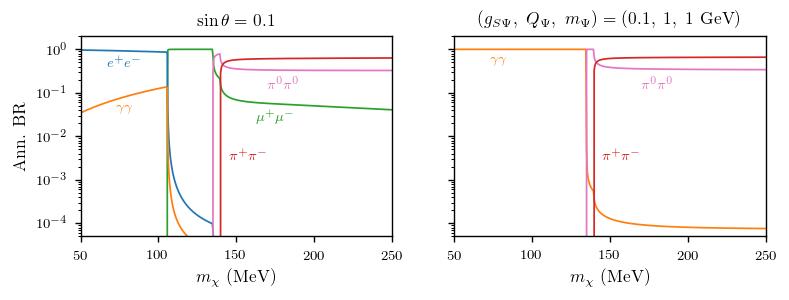

In [8]:
fig, axs = plt.subplots(1, bfs.size, sharex=True, sharey=True,
                        figsize=(base_fig_dim, 0.3 * base_fig_dim))

for idx in range(bfs.size):
    ax = axs[idx]

    # Plot BRs
    for fs in ScalarMediator.list_annihilation_final_states():
        ax.plot(mxs, bfs[idx][fs],
                label=get_tex_label(fs), color=get_color(fs), linewidth=1)

    # Formatting
    ax.set_xlabel(r"$m_\chi$ (MeV)")
    if idx == 0:
        ax.set_yscale("log")
        ax.set_xlim(mxs[[0, -1]])
        ax.set_ylim(5e-5, 2)
        ax.set_ylabel("Ann. BR")

# Label couplings
axs[0].set_title(r"$\sin\theta = 0.1$", fontsize=10)
axs[1].set_title(r"$(g_{S\Psi},~Q_\Psi,~m_\Psi) = (0.1,~1,~1~\mathrm{GeV})$",
                 fontsize=10)

# Label final states
for idx in range(2):
    axs[idx].text(145, 3e-3, r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"), fontsize=8)
    axs[idx].text(180, 1.3e-1, r"$\pi^0 \pi^0$",
                     color=get_color("pi0 pi0"), fontsize=8, ha="center")

axs[0].text(175, 2.3e-2, r"$\mu^+ \mu^-$",
            color=get_color("mu mu"), fontsize=8, ha="center")
axs[0].text(78, 4e-1, r"$e^+ e^-$",
            color=get_color("e e"), fontsize=8, ha="center")
axs[0].text(78, 4e-2, r"$\gamma \gamma$",
            color=get_color("g g"), fontsize=8, ha="center")
axs[1].text(78, 5e-1, r"$\gamma \gamma$",
            color=get_color("g g"), fontsize=8, ha="center")

fig.savefig("figures/scalar_branching_fractions.pdf", bbox_inches="tight")

### 4 panels

In [4]:
mxs = np.logspace(np.log10(50), np.log10(250), 500)
mM_light = 200.
mM_heavy = 1000.
mMs = [mM_light, mM_heavy]
vx = 1e-3

sms = np.array([[HiggsPortal(100, mM, gsxx=1., stheta=1e-1)
                 for mM in mMs],
                [HeavyQuark(100, mM, gsxx=1., gsQ=1e-1, mQ=1e3, QQ=1.)
                 for mM in mMs]])
bfs = []

for row in range(2):
    bfs_temp = []
    
    for col in range(2):
        # Computes BRs for each DM mass
        bfs_raw = []
        for mx in mxs:
            sms[row, col].mx = mx
            e_cm = 2. * mx * (1 + 0.5 * vx**2)
            
            bfs_raw.append(sms[row, col].annihilation_branching_fractions(e_cm))
            
        # Convert the list of dicts into a dict of lists
        bfs_temp.append({fs: np.array([bf[fs] for bf in bfs_raw])
                         for fs in ScalarMediator.list_annihilation_final_states()})

    bfs.append(bfs_temp)
    
bfs = np.array(bfs)

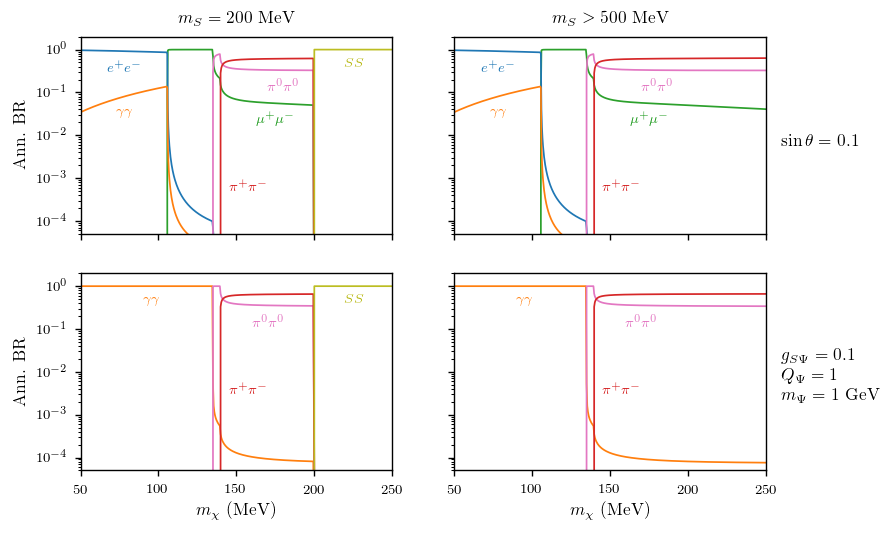

In [5]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        figsize=(7.07,
                                 0.65*7.07))

for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        
        # Plot BRs
        for fs in ScalarMediator.list_annihilation_final_states():
            ax.plot(mxs, bfs[row, col][fs],
                    label=get_tex_label(fs), color=get_color(fs), linewidth=1)
        
        # Formatting
        ax.set_yscale("log")
        ax.set_xlim(mxs[[0, -1]])
        ax.set_ylim(5e-5, 2)

# Only label outer plots' axes
for idx in range(2):
    axs[1, idx].set_xlabel(r"$m_\chi$ (MeV)")
    axs[idx, 0].set_ylabel("Ann. BR")

# Label couplings
axs[0, 1].text(260, 7e-3, r"$\sin\theta = 0.1$", va="center", fontsize=10)
axs[1, 1].text(260, 7e-3,
               r"$g_{S\Psi} = 0.1$" + "\n" + r"$Q_\Psi = 1$" + "\n" + r"$m_\Psi = 1$ GeV",
               va="center", fontsize=10)

# Label mediator masses
axs[0, 0].set_title(r"$m_S = 200$ MeV", fontsize=10)
axs[0, 1].set_title(r"$m_S > 500$ MeV", fontsize=10)

# Label final states
for col in range(2):
    axs[0, col].text(78, 3e-2, r"$\gamma \gamma$",
                     color=get_color("g g"), fontsize=8, ha="center")
    axs[0, col].text(78, 3e-1, r"$e^+ e^-$",
                     color=get_color("e e"), fontsize=8, ha="center")
    axs[0, col].text(145, 5e-4, r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"), fontsize=8)
    axs[0, col].text(180, 1.1e-1, r"$\pi^0 \pi^0$",
                     color=get_color("pi0 pi0"), fontsize=8, ha="center")
    axs[0, col].text(175, 1.9e-2, r"$\mu^+ \mu^-$",
                     color=get_color("mu mu"), fontsize=8, ha="center")
    
for col in range(2):
    axs[1, col].text(95, 4e-1, r"$\gamma \gamma$",
                     color=get_color("g g"), fontsize=8, ha="center")
    axs[1, col].text(145, 3e-3, r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"), fontsize=8)
    axs[1, col].text(170, 1.1e-1, r"$\pi^0 \pi^0$",
                     color=get_color("pi0 pi0"), fontsize=8, ha="center")
for row in range(2):
    axs[row, 0].text(225, 4e-1, r"$S S$",
                     color=get_color("s s"), fontsize=8, ha="center")

# fig.savefig("figures/scalar_branching_fractions.pdf", bbox_inches="tight")

# Old

## Branching fractions as a function of $m_\chi$

### Higgs portal couplings

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


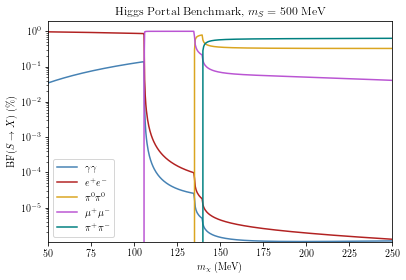

In [2]:
mx_min, mx_max, n_mxs = 50., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

hp_args = {"mx": 250., "ms": 500., "gsxx": 1., "stheta":1e-3}
hp = HiggsPortal(**hp_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    hp.mx = mx
    e_cm = 2. * hp.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(hp.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in hp.list_final_states()}

### Make the plot
plt.figure(figsize=(latex_text_width_1col, 4))

for fs, bf_list in bfs.iteritems():
    if fs != "s s":
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

plt.title(r"Higgs Portal Benchmark, $m_{S} = 500$ MeV")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"BF($S\to X$) (\%)")
plt.yscale("log")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.9)

plt.tight_layout()
# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")

### Heavy quark couplings

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


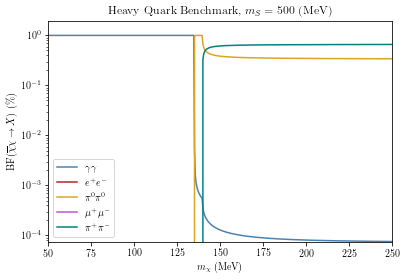

In [2]:
mx_min, mx_max, n_mxs = 50., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

hq_args = {"mx": 250., "ms": 500., "gsxx": 1., "gsQ": 1., "mQ": 1e6, "QQ": 1.}
hq = HeavyQuark(**hq_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    hq.mx = mx
    e_cm = 2. * hq.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(hq.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in hq.list_final_states()}

### Make the plot
plt.figure(figsize=(latex_text_width_1col, 4))

for fs, bf_list in bfs.iteritems():
    if fs != "s s":
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

plt.title("Heavy Quark Benchmark, $m_{S} = 500$ (MeV)")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"BF$(\overline{\chi}\chi\to X)$ (\%)")
plt.yscale("log")
plt.xscale("linear")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.9)

plt.tight_layout()
# plt.savefig("figures/scalar_branching_fractions_heavy_quark.pdf")

## Branching fractions for mediator decay

### Higgs portal

(4.2394248707637134e-07, 1.9)

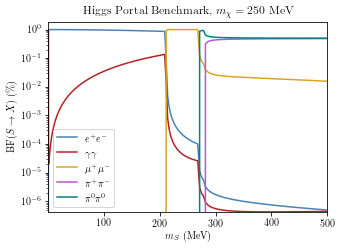

In [3]:
mx = 250.

ms_min, ms_max, n_mss = 1., 2. * mx, 500
mss = np.logspace(np.log10(ms_min), np.log10(ms_max), n_mss)

hp_args = {"mx": 250., "ms": 500., "gsxx": 1., "stheta":1e-3}
hp = HiggsPortal(**hp_args)

# Compute branching fractions for different couplings
bfs_raw = []
for ms in mss:
    hp.ms = ms
    bfs_raw.append(hp.partial_widths())
    
bfs = {fs: np.array([bf[fs] for bf in bfs_raw]) for fs in ['mu mu', 'e e', 'g g', 'pi0 pi0', 'pi pi', "total"]}
bfs = {fs: widths / bfs["total"] for fs, widths in bfs.iteritems() if fs != "total"}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, bf_list in bfs.iteritems():
#     if fs != "s s":
    plt.plot(mss, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("Higgs Portal Benchmark, $m_{\chi} = 250$ MeV")
plt.xlabel(r"$m_S$ (MeV)")
plt.ylabel(r"BF($S\to X$) (\%)")
plt.legend()
plt.xlim(mss[[0, -1]])
plt.yscale("log")
plt.ylim(0, 1.9)

# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")

### Heavy Quarks

(2.8261051490983887e-05, 1.9)

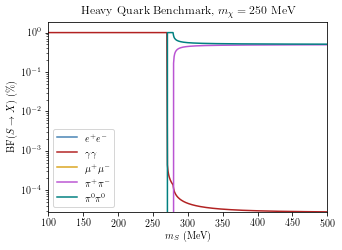

In [5]:
mx = 250.

ms_min, ms_max, n_mss = 100., 2. * mx, 500
mss = np.linspace(ms_min, ms_max, n_mss)

hq_args = {"mx": 250., "ms": 500., "gsxx": 1., "gsQ": 1., "mQ": 1e6, "QQ": 1.}
hq = HeavyQuark(**hq_args)

# Compute branching fractions for different couplings
bfs_raw = []
for ms in mss:
    hq.ms = ms
    bfs_raw.append(hq.partial_widths())
    
bfs = {fs: np.array([bf[fs] for bf in bfs_raw]) for fs in ['mu mu', 'e e', 'g g', 'pi0 pi0', 'pi pi', "total"]}
bfs = {fs: widths / bfs["total"] for fs, widths in bfs.iteritems() if fs != "total"}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, bf_list in bfs.iteritems():
#     if fs != "s s":
    plt.plot(mss, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("Heavy Quark Benchmark, $m_{\chi} = 250$ MeV")
plt.xlabel(r"$m_S$ (MeV)")
plt.ylabel(r"BF($S\to X$) (\%)")
plt.legend()
plt.xlim(mss[[0, -1]])
plt.yscale("log")
plt.ylim(0, 1.9)

# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")